In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **데이터 로드 (2024년)**

In [ ]:
df2024 = pd.read_excel("/content/drive/MyDrive/관광공모전/data/sav/2024.xlsx")

In [ ]:
df = df2024.copy()
df.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936


## **연령대**

In [ ]:
df['D_AGE'] = df['D_AGE'].str.replace(' ', '', regex=False)

/tmp/ipython-input-13-833893383.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='magma')


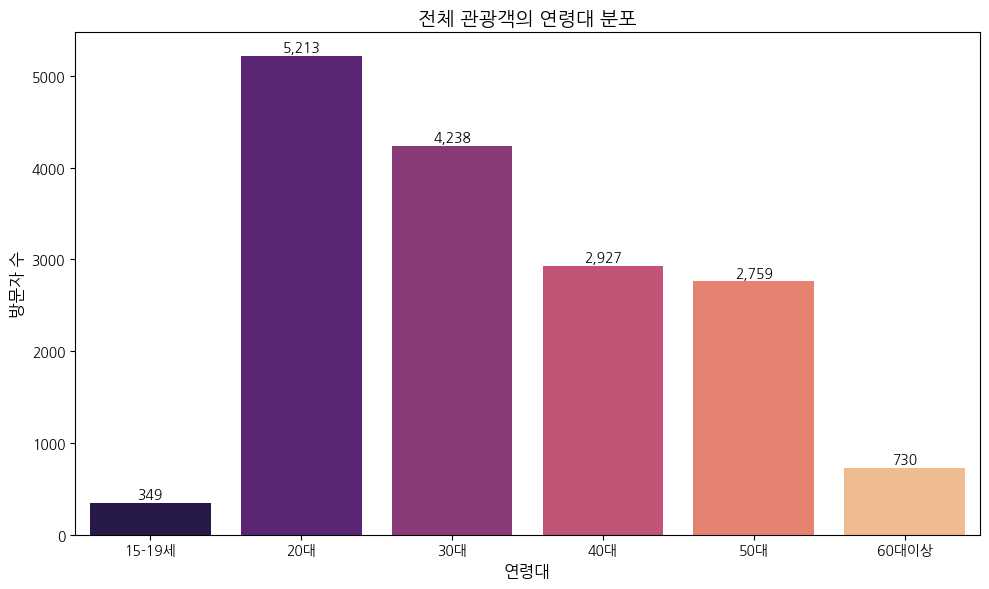

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연령대 분포 계산
age_counts = df['D_AGE'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='magma')

plt.title('전체 관광객의 연령대 분포', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('방문자 수', fontsize=12)

# 수치 표시
for i, v in enumerate(age_counts.values):
    plt.text(i, v + max(age_counts.values) * 0.01, f'{v:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


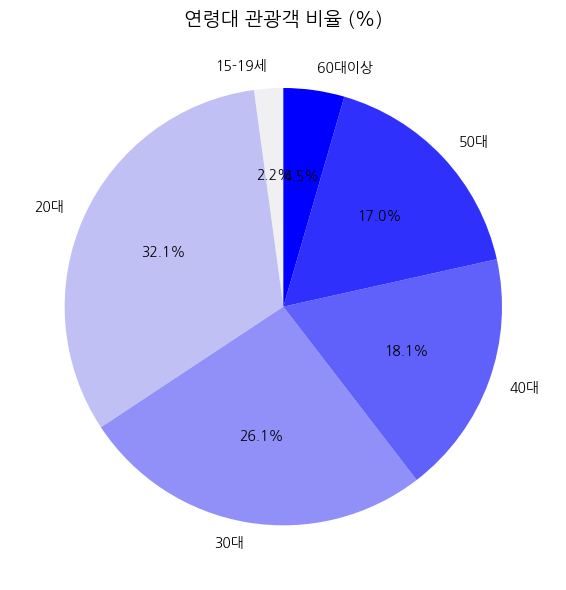

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(
    age_counts.values,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('light:b')
)
plt.title('연령대 관광객 비율 (%)', fontsize=14)
plt.tight_layout()
plt.show()


### 국가별 연령대

In [ ]:
df['D_NAT'] = df['D_NAT'].str.replace(' ', '', regex=False)

/tmp/ipython-input-33-1232016512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=older_ratio.index.astype(str), y=older_ratio.values, palette='crest')


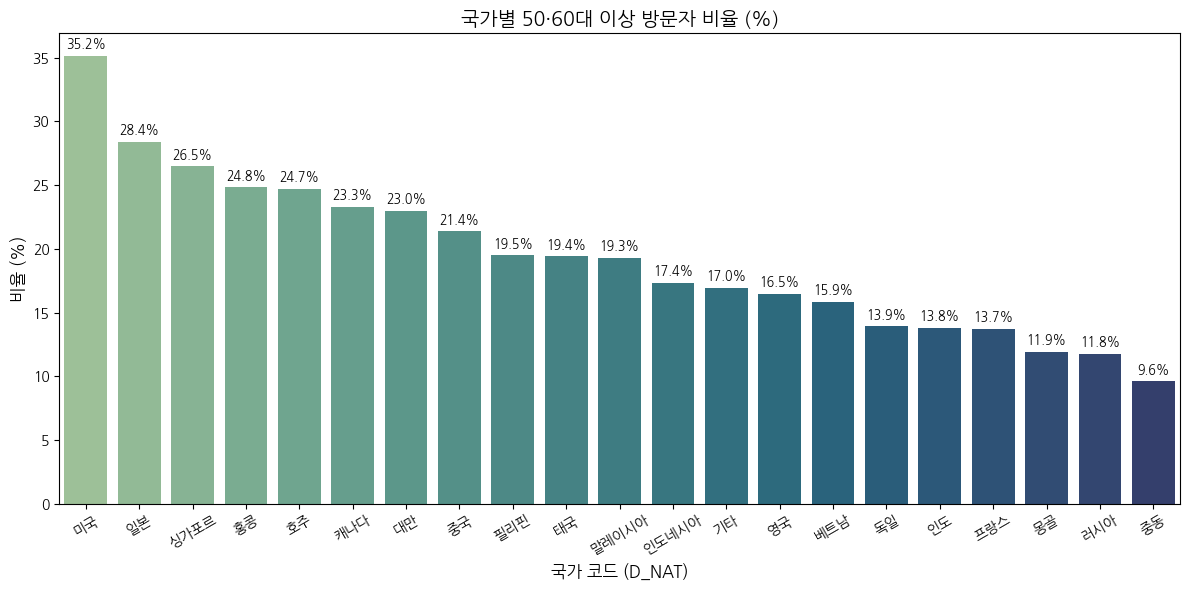

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 50대 또는 60대 이상만 필터링
older_df = df[df['D_AGE'].isin(['50대', '60대이상'])]

# 2. 전체 응답자 수 국가별 계산
total_by_country = df['D_NAT'].value_counts()

# 3. 50·60대 응답자 수 국가별 계산
older_by_country = older_df['D_NAT'].value_counts()

# 4. 비율 계산 (50·60대 비중)
older_ratio = (older_by_country / total_by_country) * 100
older_ratio = older_ratio.dropna().sort_values(ascending=False)

# 5. 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=older_ratio.index.astype(str), y=older_ratio.values, palette='crest')

# 6. 수치 표시 (막대 위에)
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(older_ratio.values) * 0.01,  # 살짝 위에 표시
        f'{height:.1f}%',
        ha='center', va='bottom',
        fontsize=9
    )

# 7. 축 설정
plt.title('국가별 50·60대 이상 방문자 비율 (%)', fontsize=14)
plt.xlabel('국가 코드 (D_NAT)', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


/tmp/ipython-input-28-2721710412.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=older_by_country.index.astype(str), y=older_by_country.values, palette='flare')


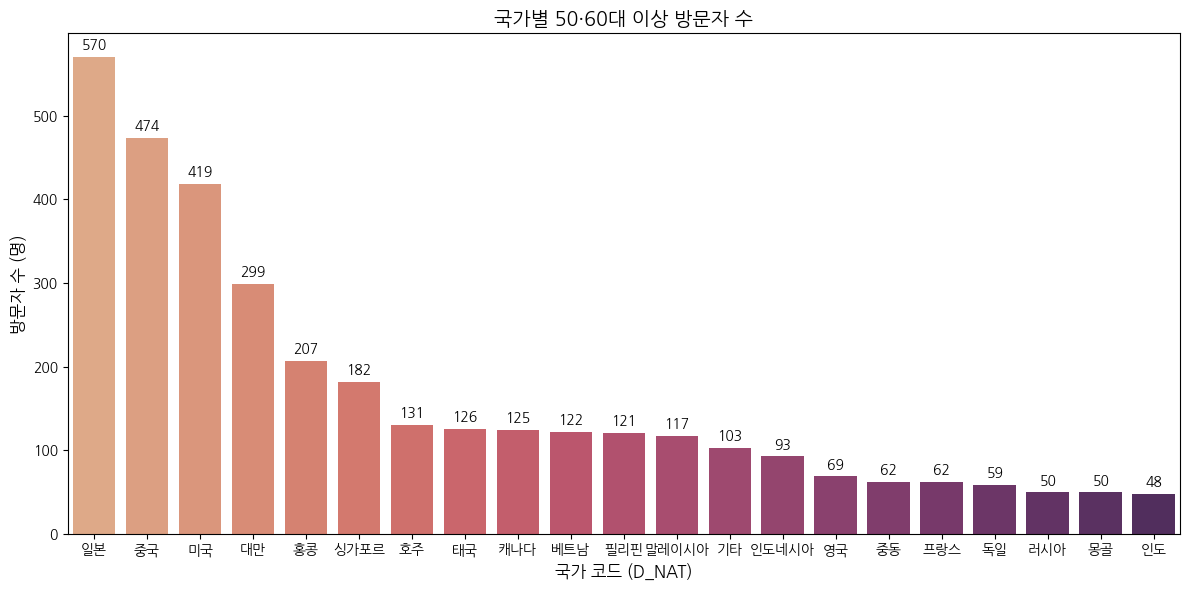

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 50대 또는 60대 이상만 필터링
older_df = df[df['D_AGE'].isin(['50대', '60대이상'])]

# 2. 국가별 50·60대 방문자 수 계산
older_by_country = older_df['D_NAT'].value_counts().sort_values(ascending=False)

# 3. 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=older_by_country.index.astype(str), y=older_by_country.values, palette='flare')

plt.title('국가별 50·60대 이상 방문자 수', fontsize=14)
plt.xlabel('국가 코드 (D_NAT)', fontsize=12)
plt.ylabel('방문자 수 (명)', fontsize=12)
plt.xticks(rotation=0)

# 4. 막대 위 수치 표시
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(older_by_country.values) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


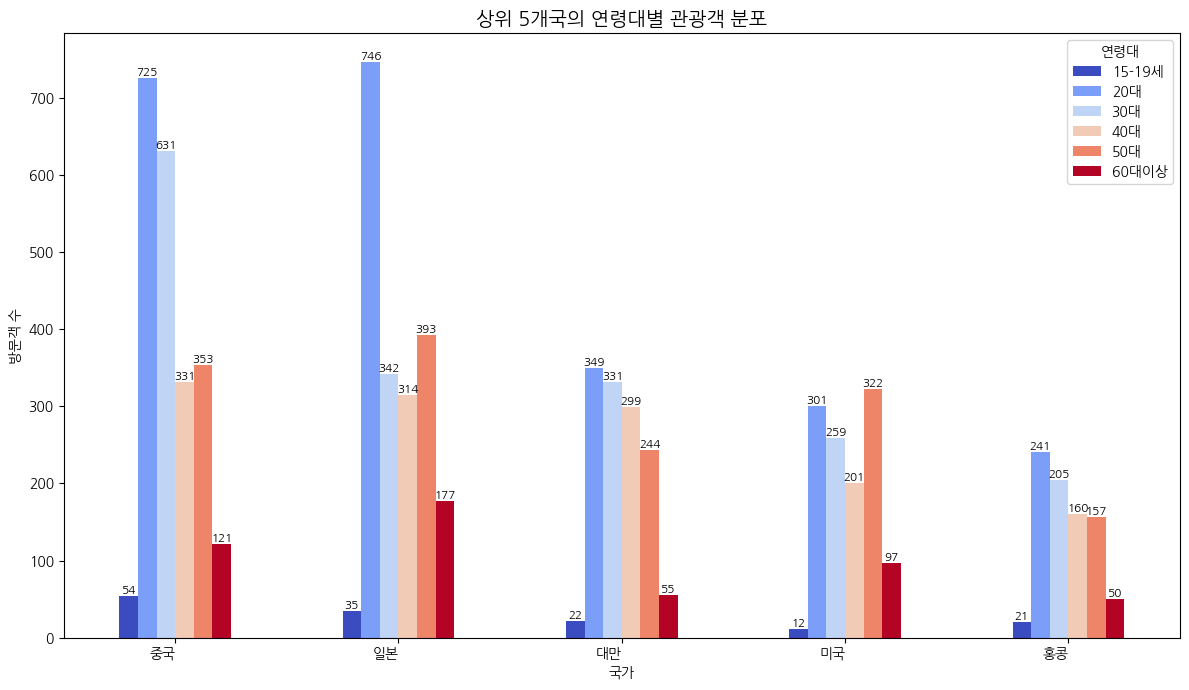

In [ ]:
# 상위 5개 국가 추출
top5_nations = df['D_NAT'].value_counts().head(5).index.tolist()

# 상위 5개국에 해당하는 데이터만 필터링
filtered_df = df[df['D_NAT'].isin(top5_nations)]

# 국가별 연령대별 교차표 생성 및 국가 정렬
filtered_counts = pd.crosstab(filtered_df['D_NAT'], filtered_df['D_AGE'])
filtered_counts = filtered_counts.loc[top5_nations]  # 방문객 수 기준 순서 유지

# 시각화: 다중 막대그래프
ax = filtered_counts.plot(kind='bar', figsize=(12, 7), colormap='coolwarm')
plt.title('상위 5개국의 연령대별 관광객 분포', fontsize=14)
plt.xlabel('국가')
plt.ylabel('방문객 수')
plt.legend(title='연령대')
plt.xticks(rotation=0, ha='right')
# 막대 끝에 수치 표시
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8.5)

plt.tight_layout()
plt.show()

### 연령대별 성별

In [ ]:
df['D_SEX'] = df['D_SEX'].str.replace(' ', '', regex=False)

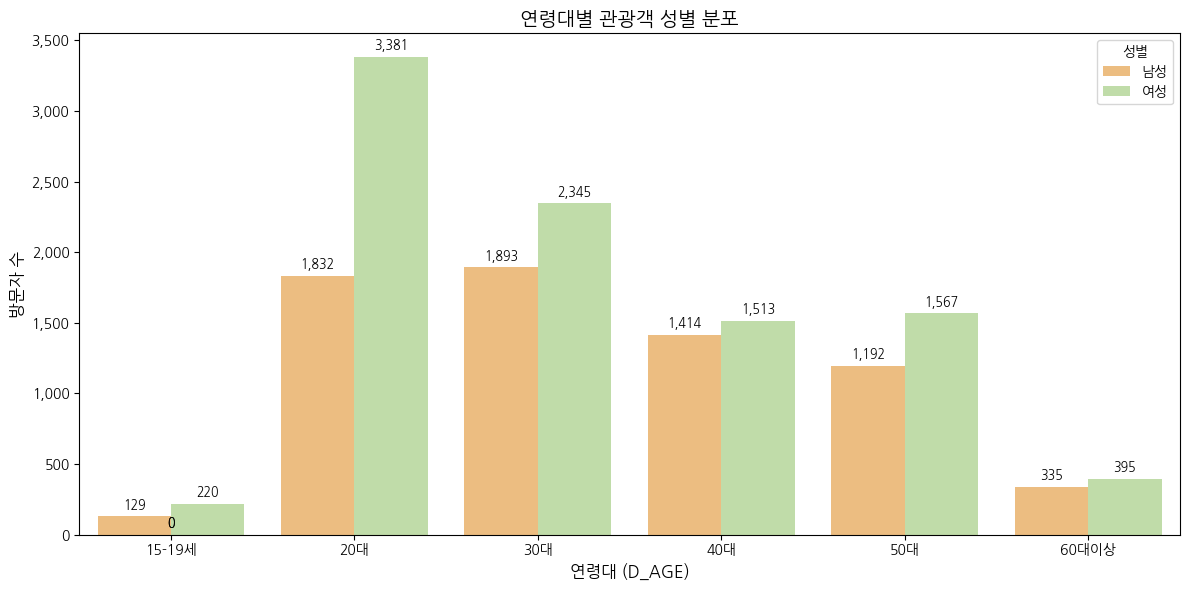

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# 1. 집계: 성별 × 연령대 방문자 수
grouped = df.groupby(['D_AGE', 'D_SEX']).size().reset_index(name='count')

# 2. 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='D_AGE', y='count', hue='D_SEX', palette='Spectral')

# 3. 막대 위에 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(grouped['count']) * 0.01,
        f'{int(height):,}',
        ha='center', va='bottom',
        fontsize=9
    )

# 4. y축 콤마 포맷 설정
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 5. 그래프 설정
plt.title('연령대별 관광객 성별 분포', fontsize=14)
plt.xlabel('연령대 (D_AGE)', fontsize=12)
plt.ylabel('방문자 수', fontsize=12)
plt.legend(title='성별')
plt.tight_layout()
plt.show()


#### 미국 연령대별 성별

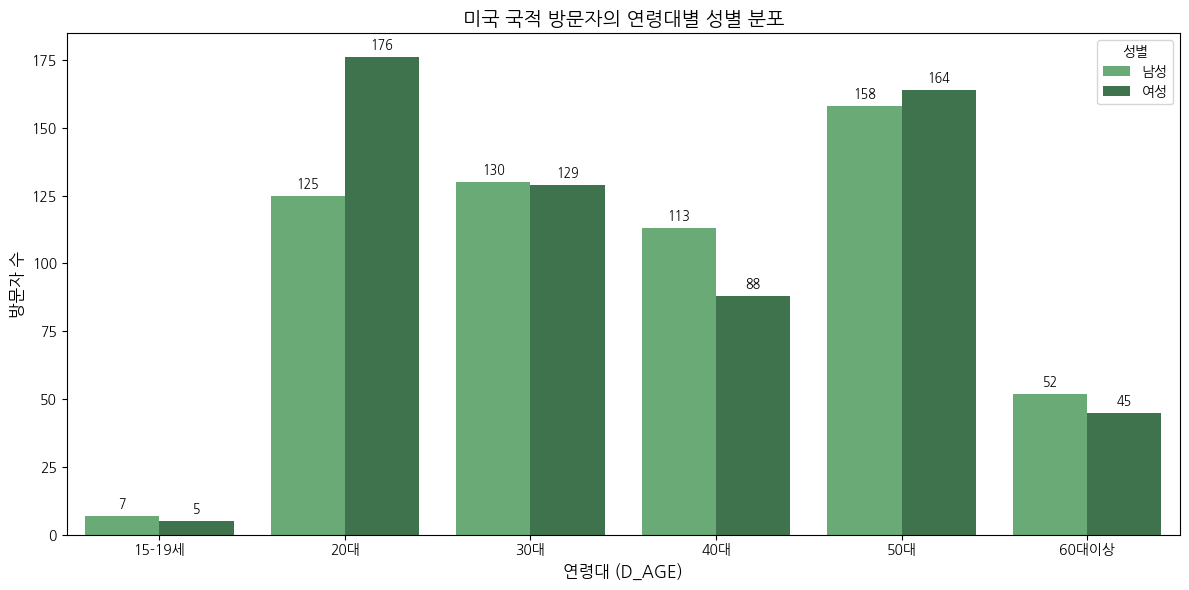

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# 0. 미국 국적만 필터링
us_df = df[df['D_NAT'] == '미국']

# 1. 집계: 성별 × 연령대 방문자 수 (미국만)
grouped = us_df.groupby(['D_AGE', 'D_SEX']).size().reset_index(name='count')

# 2. 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='D_AGE', y='count', hue='D_SEX', palette='Greens_d')

# 3. 막대 위에 수치 표시 (0인 경우 생략, 작으면 소수점 포함)
for bar in ax.patches:
    height = bar.get_height()
    if height < 1:
        continue  # 너무 작은 막대는 생략
    label = f'{int(height):,}' if height >= 10 else f'{height:.0f}'
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(grouped['count']) * 0.01,
        label,
        ha='center', va='bottom',
        fontsize=9
    )

# 4. y축 콤마 포맷 설정
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 5. 그래프 설정
plt.title('미국 국적 방문자의 연령대별 성별 분포', fontsize=14)
plt.xlabel('연령대 (D_AGE)', fontsize=12)
plt.ylabel('방문자 수', fontsize=12)
plt.legend(title='성별')
plt.tight_layout()
plt.show()


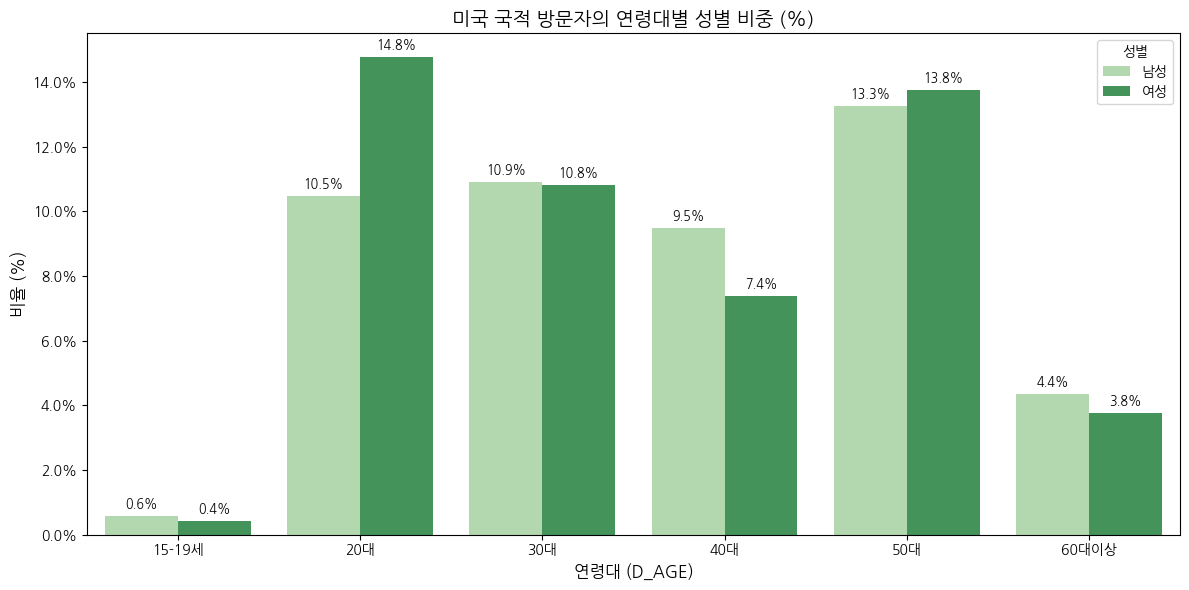

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# 0. 미국 국적만 필터링
us_df = df[df['D_NAT'] == '미국']

# 1. 성별 × 연령대 방문자 수 계산
grouped = us_df.groupby(['D_AGE', 'D_SEX']).size().reset_index(name='count')

# 2. 전체 미국 응답자 수로 나눠서 비중(%) 계산
total = grouped['count'].sum()
grouped['ratio'] = grouped['count'] / total * 100

# 3. 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='D_AGE', y='ratio', hue='D_SEX', palette='Greens')

# 4. 막대 위에 % 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    if height < 0.3:  # 0.3% 미만은 생략
        continue
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(grouped['ratio']) * 0.01,
        f'{height:.1f}%',
        ha='center', va='bottom',
        fontsize=9
    )
# 5. y축 % 포맷
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# 6. 그래프 설정
plt.title('미국 국적 방문자의 연령대별 성별 비중 (%)', fontsize=14)
plt.xlabel('연령대 (D_AGE)', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(title='성별')
plt.tight_layout()
plt.show()


## 미국 체류일수

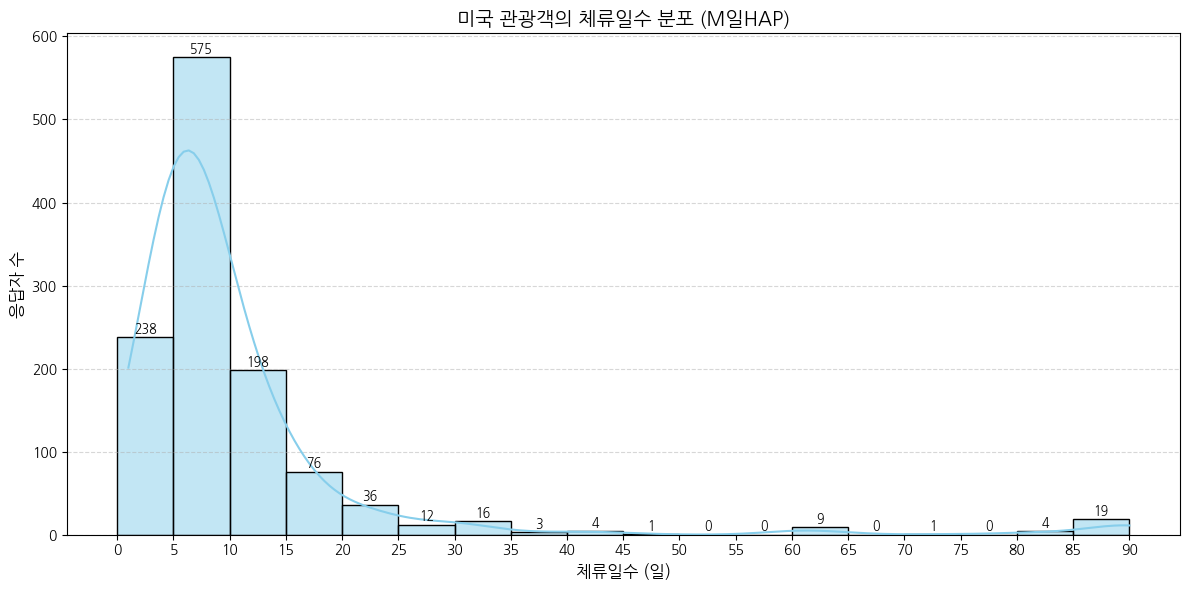

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 미국 국적 필터링
us_df = df[df['D_NAT'] == '미국']
us_df_stay = us_df['M일HAP'].dropna()

# 5일 단위 구간
max_stay = int(us_df_stay.max())
bins = list(range(0, max_stay + 5, 5))

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.histplot(us_df_stay, bins=bins, kde=True, color='skyblue', edgecolor='black')

# 타이틀 및 라벨
plt.title('미국 관광객의 체류일수 분포 (M일HAP)', fontsize=14)
plt.xlabel('체류일수 (일)', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.xticks(ticks=bins)

# 막대 위에 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    if height > -1:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(us_df_stay.value_counts()) * 0.01,
            f'{int(height):,}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# 격자 및 마무리
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-68-1899999367.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stay_counts.index, y=stay_counts.values, palette='Blues_r')


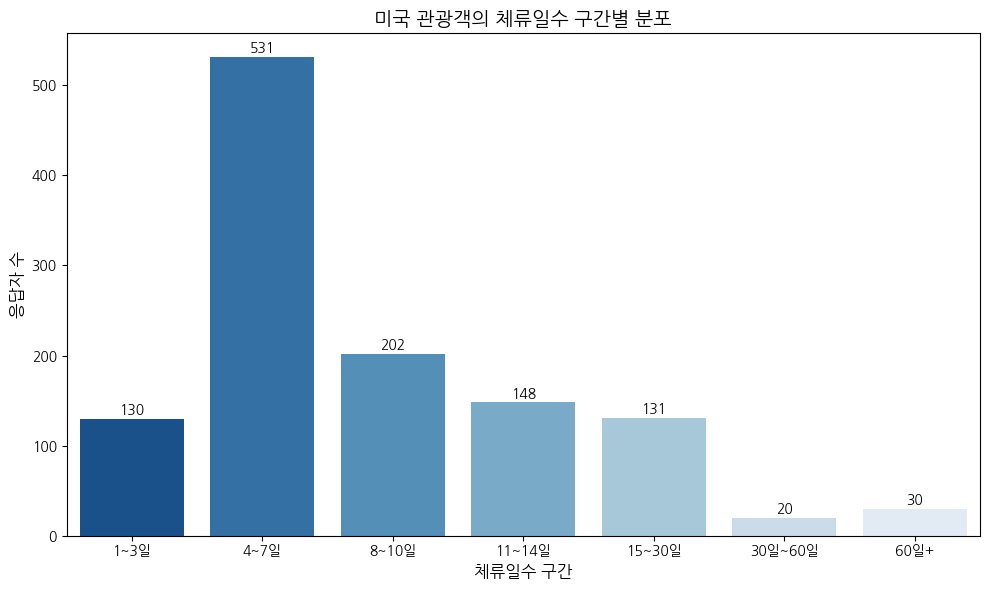

In [ ]:
# 체류일수 구간 분류
stay_bins = pd.cut(us_df_stay, bins=[0, 3, 7, 10, 14, 30, 60, 100],
                   labels=['1~3일', '4~7일', '8~10일', '11~14일', '15~30일', '30일~60일', '60일+'])

stay_counts = stay_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=stay_counts.index, y=stay_counts.values, palette='Blues_r')

# 수치 표시
for i, v in enumerate(stay_counts.values):
    plt.text(i, v + max(stay_counts.values)*0.01, f'{v:,}', ha='center', fontsize=10)

plt.title('미국 관광객의 체류일수 구간별 분포', fontsize=14)
plt.xlabel('체류일수 구간', fontsize=12)
plt.ylabel('응답자 수', fontsize=12)
plt.tight_layout()
plt.show()


### 미국 연령대별 체류일수

/tmp/ipython-input-65-4107280993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_stay_by_age.index, y=avg_stay_by_age.values, palette='Paired')


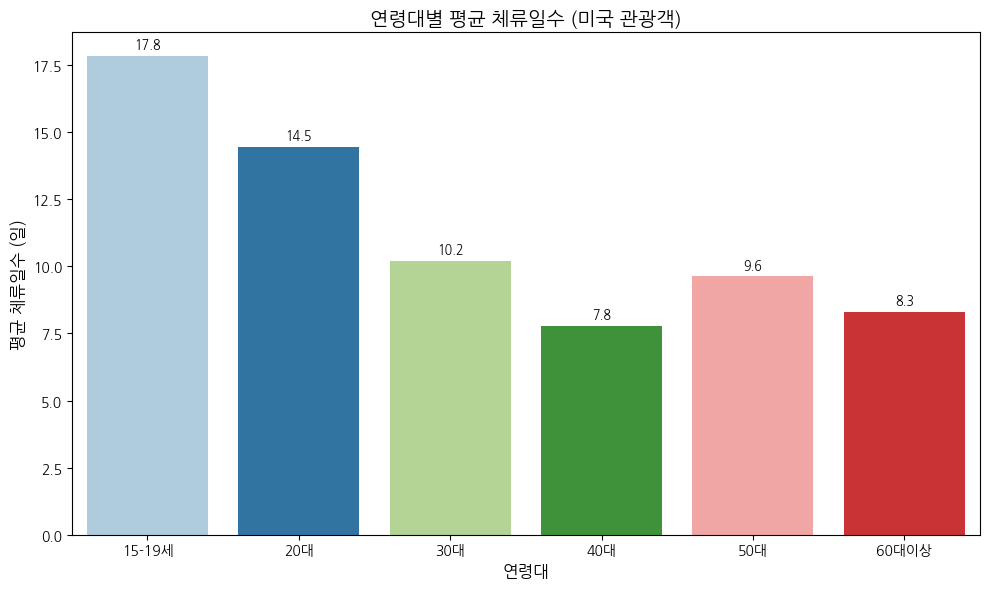

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연령대 순서 수동 지정
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대이상']

# 평균 체류일수 계산 및 정렬
avg_stay_by_age = us_df.groupby('D_AGE')['M일HAP'].mean().reindex(age_order)

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_stay_by_age.index, y=avg_stay_by_age.values, palette='Paired')

# 막대 위에 수치 표시
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(avg_stay_by_age.values) * 0.01,
        f'{height:.1f}',
        ha='center', va='bottom',
        fontsize=9
    )

# 축 설정
plt.title('연령대별 평균 체류일수 (미국 관광객)', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('평균 체류일수 (일)', fontsize=12)
plt.tight_layout()
plt.show()


#### 왜?
- 10~20대 :  방학에 맞춰서 방문한다고 판단

- 30~40대 : 짧은 휴가형 방문 (직장, 가족등으로 인해 길게 휴가를 낼 수 없는 조건이라고 판단)

- 50대~ : 시간은 늘지만, 체력 등의 제약으로 인해 초장기체류 기피한다고 판단

/tmp/ipython-input-67-375889684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['고령층여부'] = us_df['D_AGE'].isin(['50대', '60대이상']).map({True: '고령층', False: '비고령층'})
/tmp/ipython-input-67-375889684.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='고령층여부', y='M일HAP', data=us_df, palette='Set2')


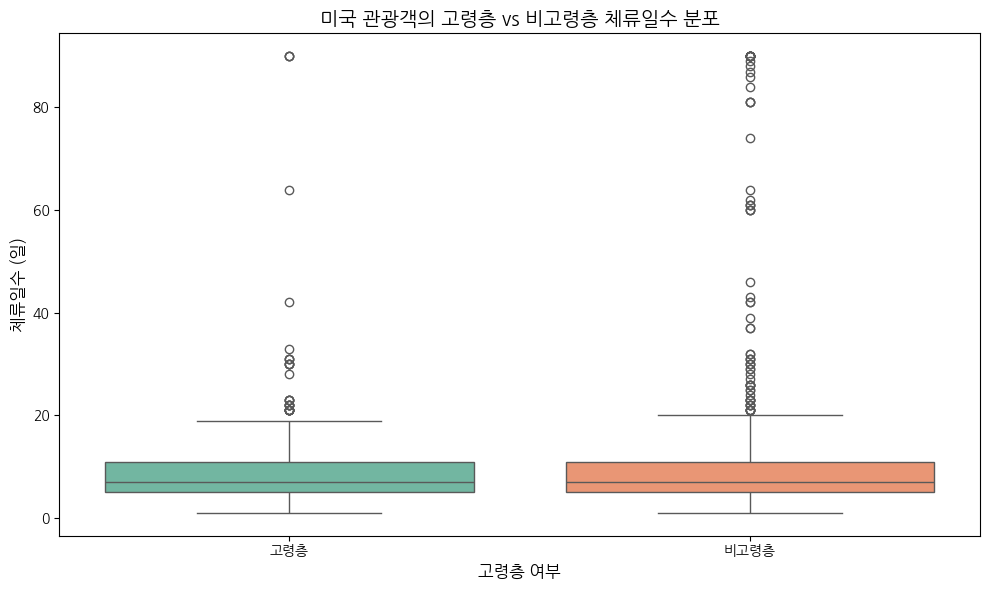

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 고령층 여부 구분 변수 추가
us_df['고령층여부'] = us_df['D_AGE'].isin(['50대', '60대이상']).map({True: '고령층', False: '비고령층'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='고령층여부', y='M일HAP', data=us_df, palette='Set2')

plt.title('미국 관광객의 고령층 vs 비고령층 체류일수 분포', fontsize=14)
plt.xlabel('고령층 여부', fontsize=12)
plt.ylabel('체류일수 (일)', fontsize=12)
plt.tight_layout()
plt.show()


## 연령대별 1인 지출 금액

/tmp/ipython-input-69-1936951502.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='D_AGE', y='총액1인TOT2', data=plot_df, order=age_order, palette='Set2')


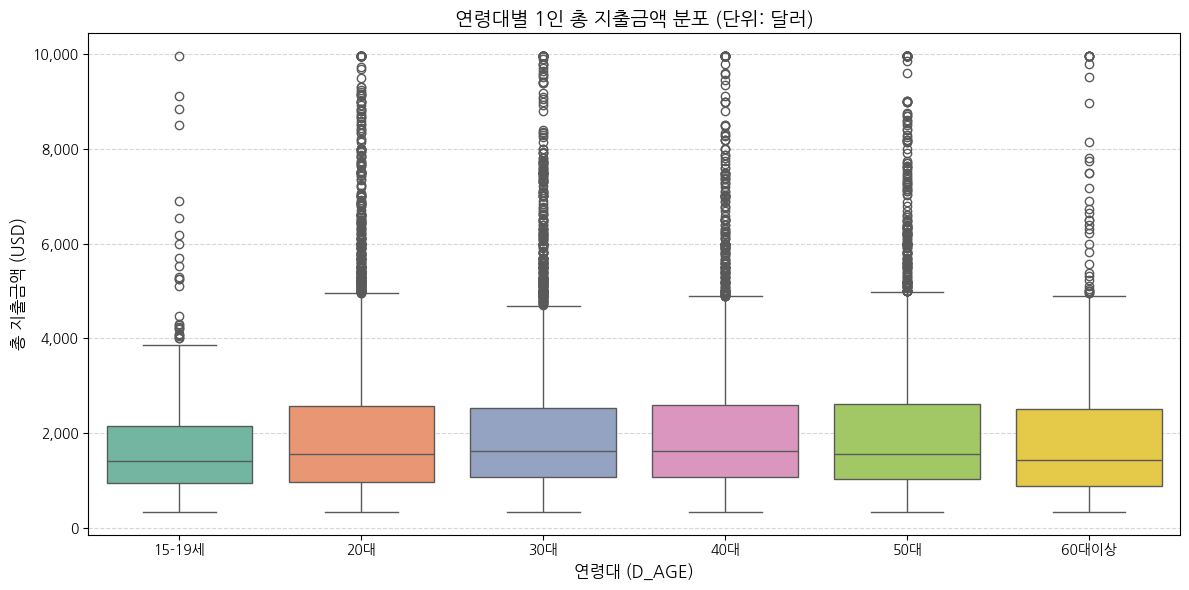

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. 연령대 순서 지정
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대이상']

# 2. 필요한 열 선택
plot_df = df[['D_AGE', '총액1인TOT2']]

# 3. 시각화
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='D_AGE', y='총액1인TOT2', data=plot_df, order=age_order, palette='Set2')

# 4. 라벨, 타이틀, 축 설정
ax.set_title('연령대별 1인 총 지출금액 분포 (단위: 달러)', fontsize=14)
ax.set_xlabel('연령대 (D_AGE)', fontsize=12)
ax.set_ylabel('총 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-76-861637290.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_spending_by_group.index, y=avg_spending_by_group.values, palette='pastel')


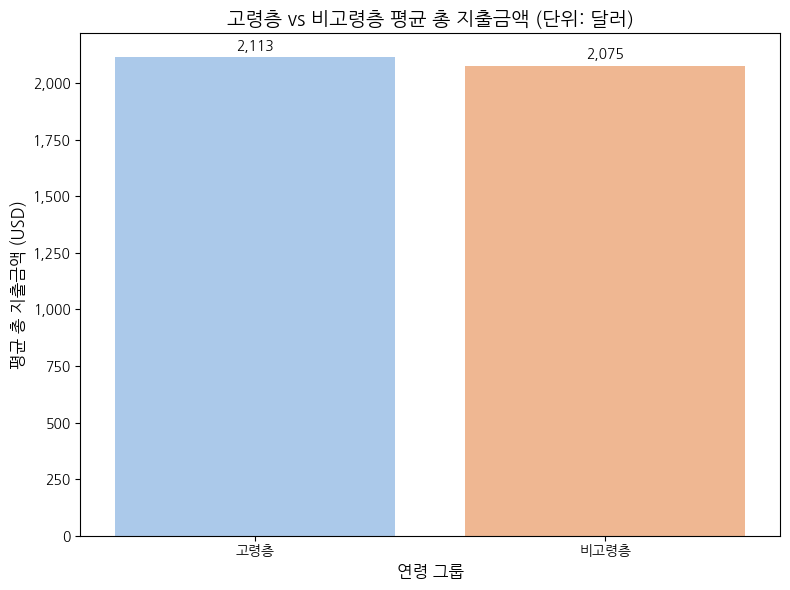

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. 고령층 여부 컬럼 생성 (50대, 60대이상 포함)
df['고령층'] = df['D_AGE'].isin(['50대', '60대이상']).map({True: '고령층', False: '비고령층'})

# 2. 평균 총 지출 계산
avg_spending_by_group = df.groupby('고령층')['총액1인TOT2'].mean()

# 3. 시각화
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=avg_spending_by_group.index, y=avg_spending_by_group.values, palette='pastel')

# 4. 막대 위 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 20, f'{int(h):,}', ha='center', va='bottom', fontsize=10)

# 5. 축 설정
ax.set_title('고령층 vs 비고령층 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('연령 그룹', fontsize=12)
ax.set_ylabel('평균 총 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


/tmp/ipython-input-86-290030188.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette='Blues_r')


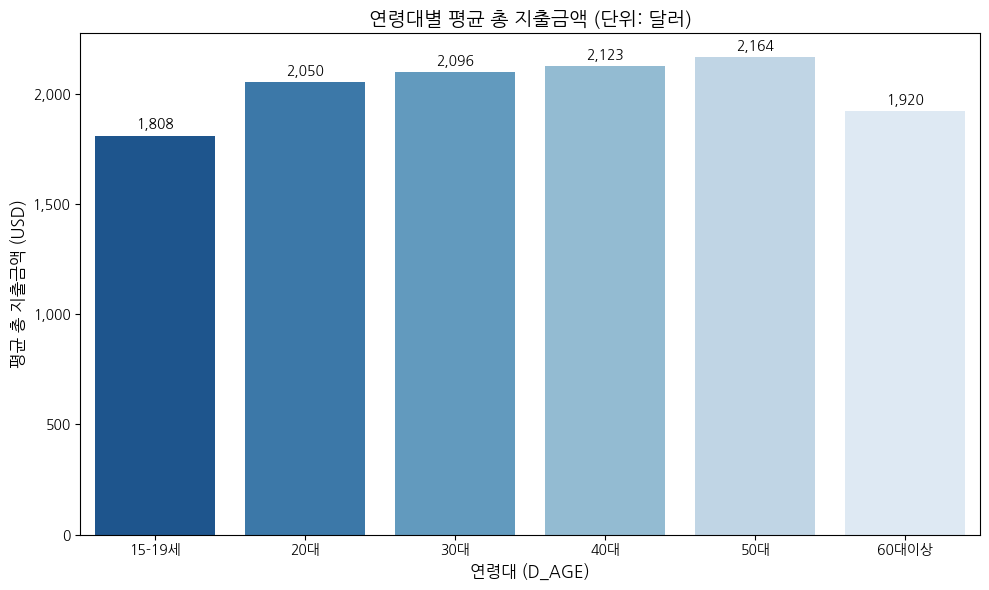

In [ ]:
# 1. 연령대 순서 지정
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대이상']

# 2. 연령대별 평균 지출 계산
avg_spending_by_age = df.groupby('D_AGE')['총액1인TOT2'].mean().reindex(age_order)

# 3. 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette='Blues_r')

# 4. 막대 위 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 20, f'{int(h):,}', ha='center', va='bottom', fontsize=10)

# 5. 축 설정
ax.set_title('연령대별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('연령대 (D_AGE)', fontsize=12)
ax.set_ylabel('평균 총 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


### 미국 연령대별 1인 지출 금액

/tmp/ipython-input-79-1355910176.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette='Reds_r')


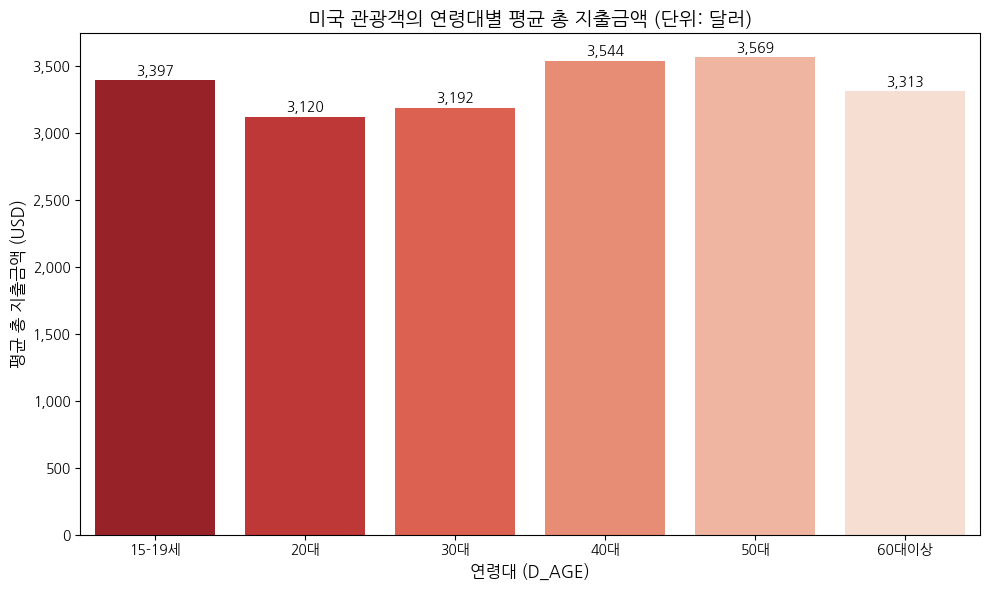

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0. 미국 국적만 필터링
us_df = df[df['D_NAT'] == '미국']

# 1. 연령대 순서 지정
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대이상']

# 2. 연령대별 평균 지출 계산 (미국만)
avg_spending_by_age = us_df.groupby('D_AGE')['총액1인TOT2'].mean().reindex(age_order)

# 3. 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette='Reds_r')

# 4. 막대 위 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 20, f'{int(h):,}', ha='center', va='bottom', fontsize=10)

# 5. 축 설정
ax.set_title('미국 관광객의 연령대별 평균 총 지출금액 (단위: 달러)', fontsize=14)
ax.set_xlabel('연령대 (D_AGE)', fontsize=12)
ax.set_ylabel('평균 총 지출금액 (USD)', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


## 연령대별 방문 목적

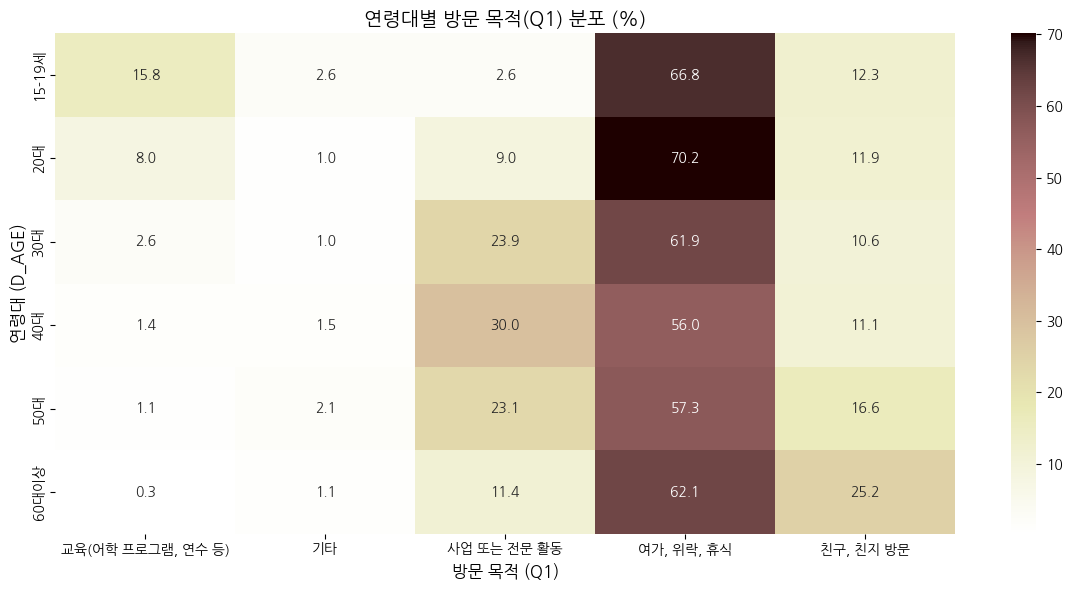

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 연령대 × 방문 목적 교차표 (비율 기준)
cross_age_q1 = pd.crosstab(
    df['D_AGE'], df['Q1'], normalize='index'
) * 100  # 각 연령대 기준 %

# 2. 연령 순서 지정 (선택)
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대이상']
cross_age_q1 = cross_age_q1.reindex(age_order)

# 3. 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_age_q1, annot=True, fmt='.1f', cmap='pink_r')

plt.title('연령대별 방문 목적(Q1) 분포 (%)', fontsize=14)
plt.xlabel('방문 목적 (Q1)', fontsize=12)
plt.ylabel('연령대 (D_AGE)', fontsize=12)
plt.tight_layout()
plt.show()


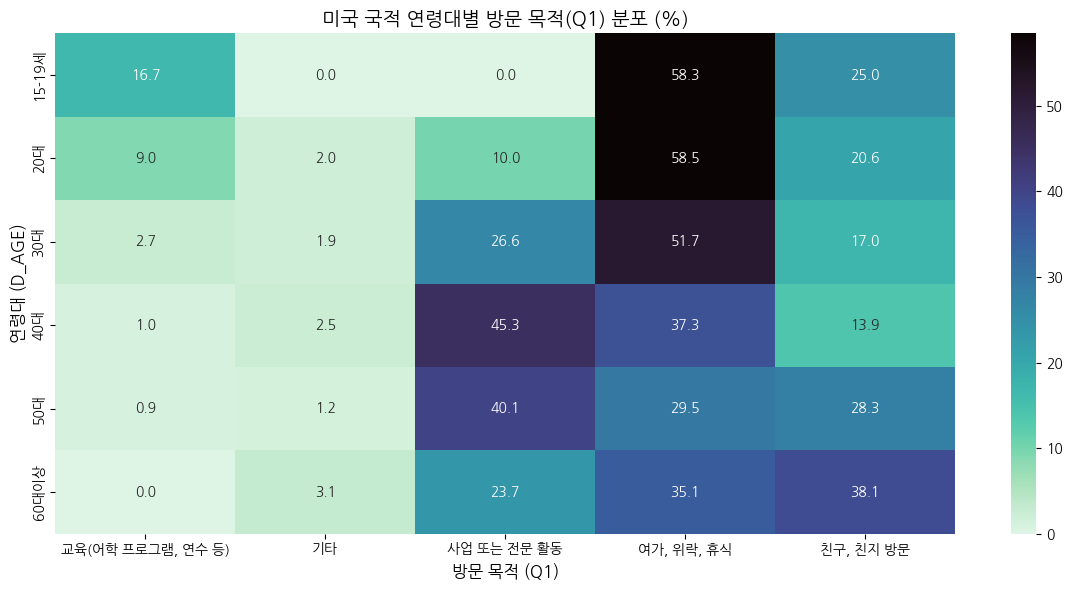

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 미국 국적만 필터링
us_df = df[df['D_NAT'] == '미국']

# 1. 연령대 × 방문 목적 교차표 (비율 기준)
cross_age_q1_us = pd.crosstab(
    us_df['D_AGE'], us_df['Q1'], normalize='index'
) * 100

# 2. 연령 순서 지정 (선택)
age_order = ['15-19세', '20대', '30대', '40대', '50대', '60대이상']
cross_age_q1_us = cross_age_q1_us.reindex(age_order)

# 3. 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cross_age_q1_us, annot=True, fmt='.1f', cmap='mako_r')

plt.title('미국 국적 연령대별 방문 목적(Q1) 분포 (%)', fontsize=14)
plt.xlabel('방문 목적 (Q1)', fontsize=12)
plt.ylabel('연령대 (D_AGE)', fontsize=12)
plt.tight_layout()
plt.show()


### 연령대별 성별 방문 목적

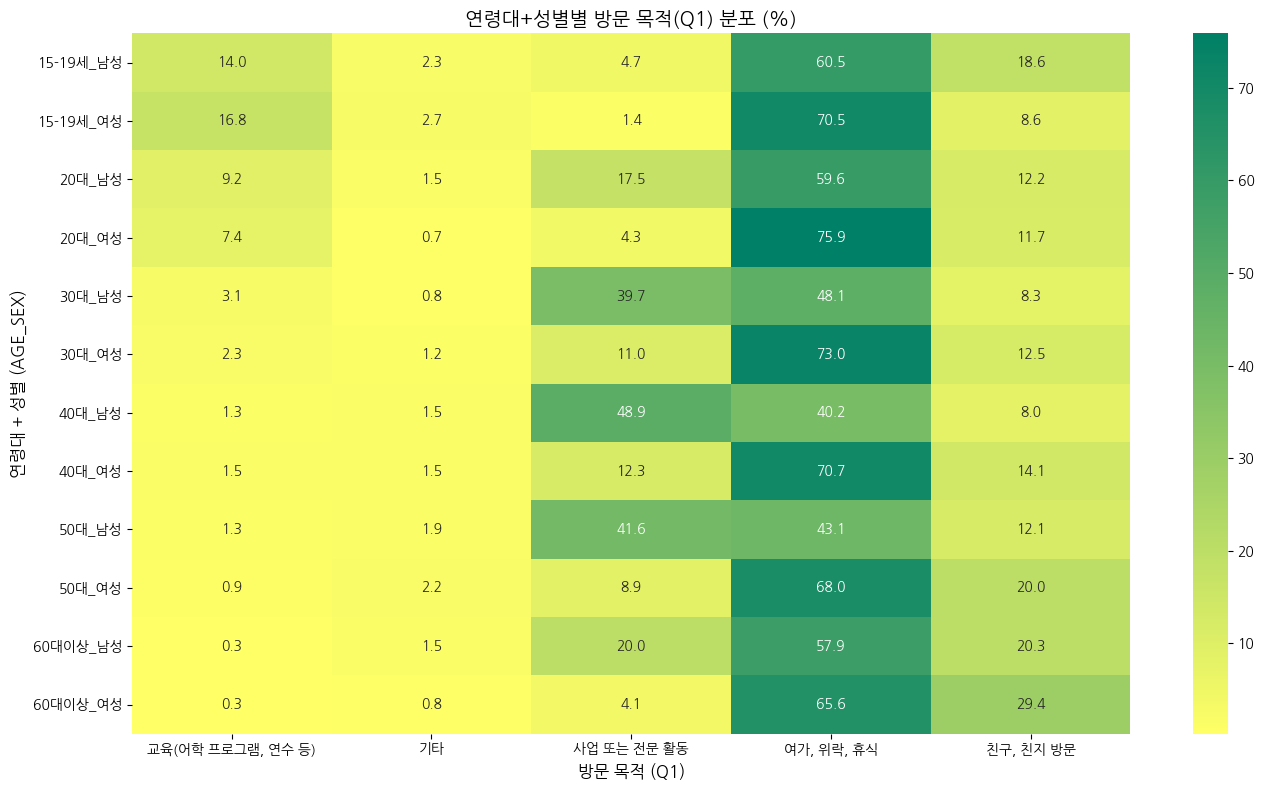

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 연령+성별 컬럼 생성
df['AGE_SEX'] = df['D_AGE'] + '_' + df['D_SEX']  # 예: '50대_여성'

# 2. 교차표 생성 (방문 목적 Q1 기준)
cross_age_sex_q1 = pd.crosstab(
    df['AGE_SEX'], df['Q1'], normalize='index'
) * 100

# 3. 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(cross_age_sex_q1, annot=True, fmt='.1f', cmap='summer_r')

plt.title('연령대+성별별 방문 목적(Q1) 분포 (%)', fontsize=14)
plt.xlabel('방문 목적 (Q1)', fontsize=12)
plt.ylabel('연령대 + 성별 (AGE_SEX)', fontsize=12)
plt.tight_layout()
plt.show()


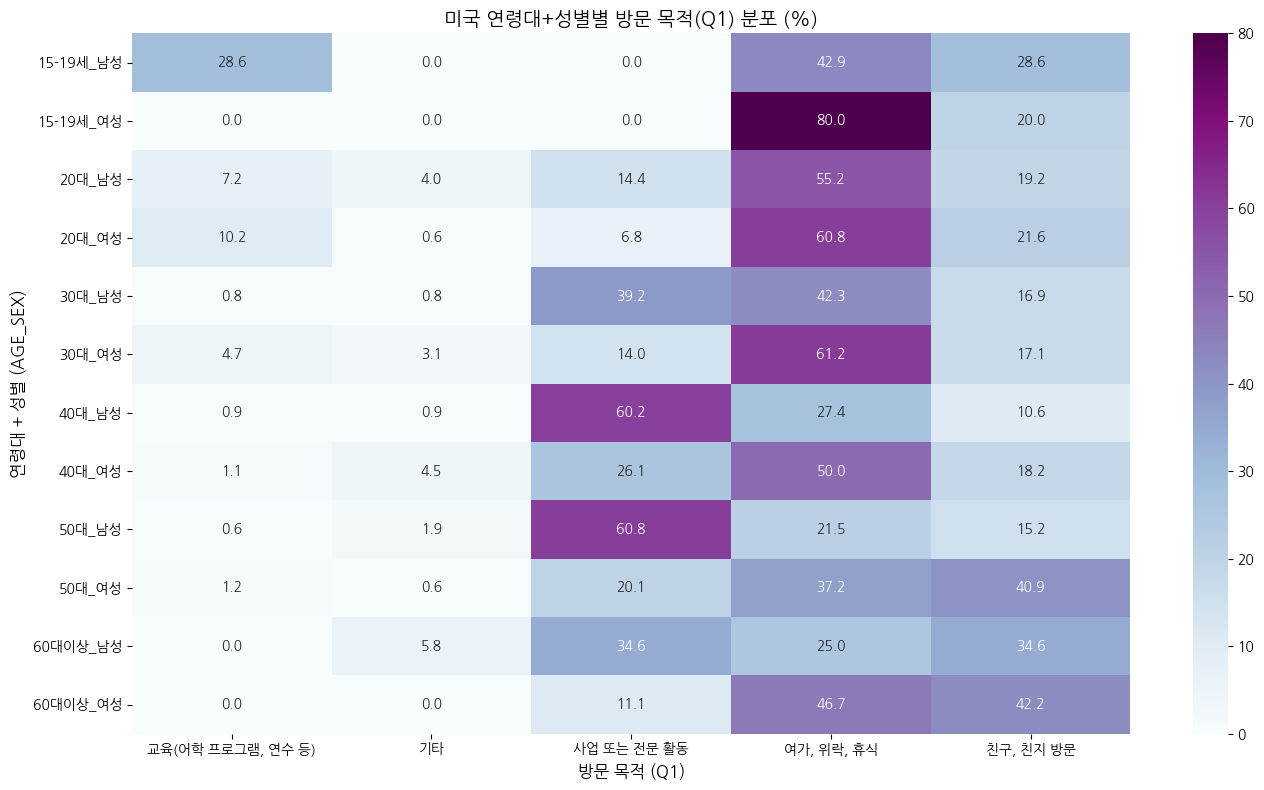

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 미국 국적만 필터링
us_df = df[df['D_NAT'] == '미국'].copy()

# 1. 연령+성별 컬럼 생성
us_df['AGE_SEX'] = us_df['D_AGE'] + '_' + us_df['D_SEX']  # 예: '50대_여성'

# 2. 교차표 생성 (방문 목적 Q1 기준)
cross_age_sex_q1_us = pd.crosstab(
    us_df['AGE_SEX'], us_df['Q1'], normalize='index'
) * 100

# 3. 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(cross_age_sex_q1_us, annot=True, fmt='.1f', cmap='BuPu')

plt.title('미국 연령대+성별별 방문 목적(Q1) 분포 (%)', fontsize=14)
plt.xlabel('방문 목적 (Q1)', fontsize=12)
plt.ylabel('연령대 + 성별 (AGE_SEX)', fontsize=12)
plt.tight_layout()
plt.show()


### 미국 5060 연령대별 방문 목적

/tmp/ipython-input-101-3718711816.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


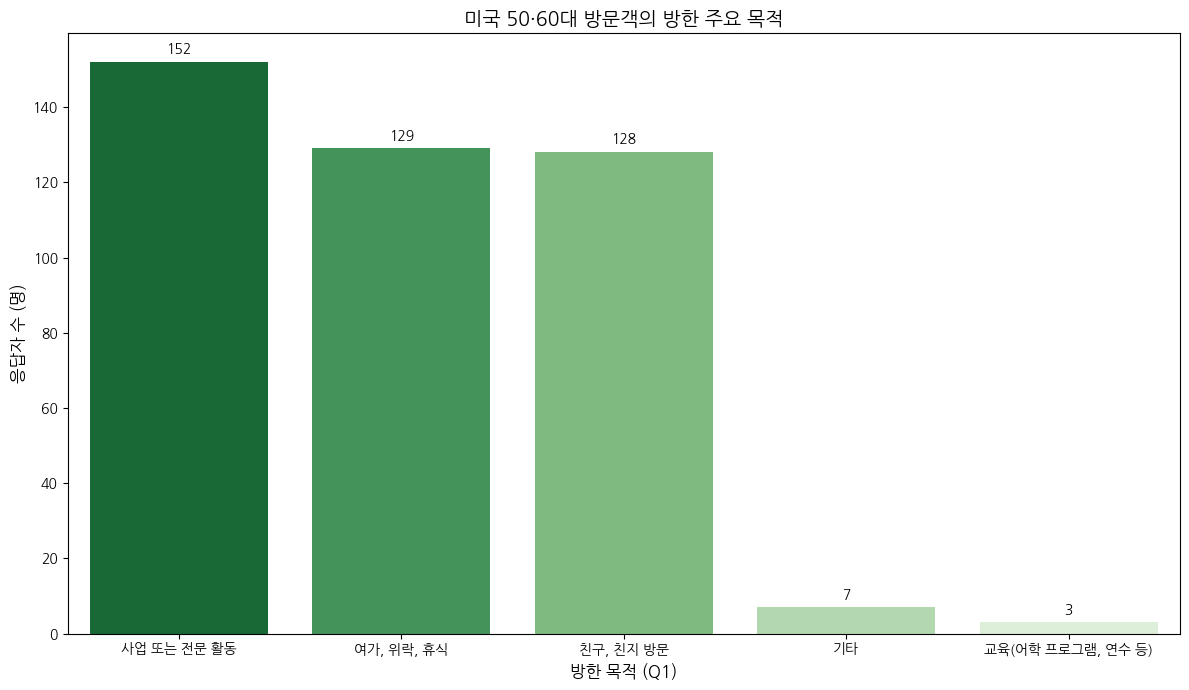

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 0) 미국 + 50대 또는 60대 이상 필터링
df_us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))]

# 1) Q1 분포 집계 및 내림차순 정렬
purpose_counts = df_us_5060['Q1'].value_counts().sort_values(ascending=False)

# 2) 막대그래프
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=purpose_counts.index,
    y=purpose_counts.values,
    palette='Greens_r'
)

# 3) 막대 위 수치 표시
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max(purpose_counts.values) * 0.01,
        f'{int(h):,}',
        ha='center', va='bottom',
        fontsize=10
    )

# 4) 레이블·타이틀·포맷
ax.set_xlabel('방한 목적 (Q1)', fontsize=12)
ax.set_ylabel('응답자 수 (명)', fontsize=12)
ax.set_title('미국 50·60대 방문객의 방한 주요 목적', fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


/tmp/ipython-input-105-2075170977.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q1_50f.index, y=q1_50f.values, palette='Purples_r', ax=axes[0])
/tmp/ipython-input-105-2075170977.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q1_50m.index, y=q1_50m.values, palette='Blues_r', ax=axes[1])


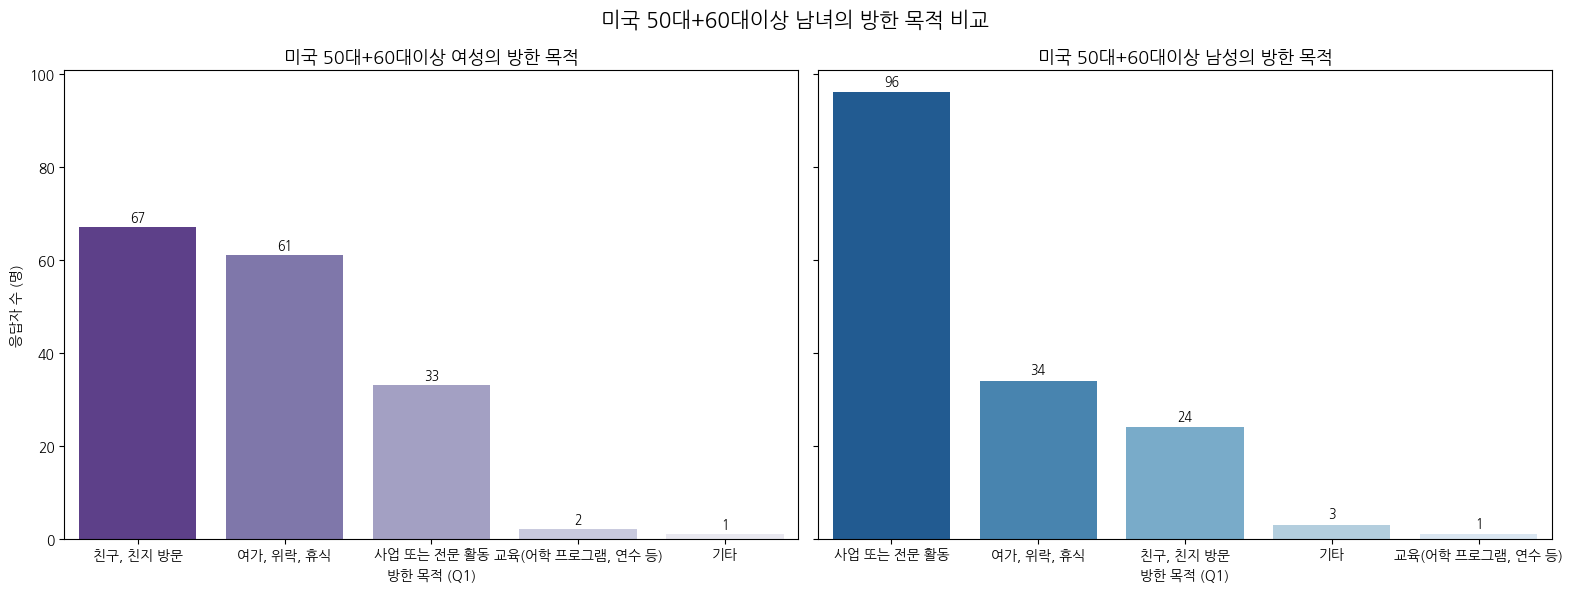

In [ ]:
df_us_50f = df[(df['D_NAT'] == '미국') & (df['D_AGE'] == '50대') & (df['D_SEX'] == '여성')]
df_us_50m = df[(df['D_NAT'] == '미국') & (df['D_AGE'] == '50대') & (df['D_SEX'] == '남성')]

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 방문 목적 집계
q1_50f = df_us_50f['Q1'].value_counts().sort_values(ascending=False)
q1_50m = df_us_50m['Q1'].value_counts().sort_values(ascending=False)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 1) 여성
sns.barplot(x=q1_50f.index, y=q1_50f.values, palette='Purples_r', ax=axes[0])
axes[0].set_title('미국 50대+60대이상 여성의 방한 목적', fontsize=13)
axes[0].set_xlabel('방한 목적 (Q1)')
axes[0].set_ylabel('응답자 수 (명)')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for bar in axes[0].patches:
    h = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, h + max(q1_50f.values)*0.01, f'{int(h):,}',
                 ha='center', va='bottom', fontsize=9)

# 2) 남성
sns.barplot(x=q1_50m.index, y=q1_50m.values, palette='Blues_r', ax=axes[1])
axes[1].set_title('미국 50대+60대이상 남성의 방한 목적', fontsize=13)
axes[1].set_xlabel('방한 목적 (Q1)')
axes[1].set_ylabel('')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for bar in axes[1].patches:
    h = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, h + max(q1_50m.values)*0.01, f'{int(h):,}',
                 ha='center', va='bottom', fontsize=9)

plt.suptitle('미국 50대+60대이상 남녀의 방한 목적 비교', fontsize=15)
plt.tight_layout()
plt.show()


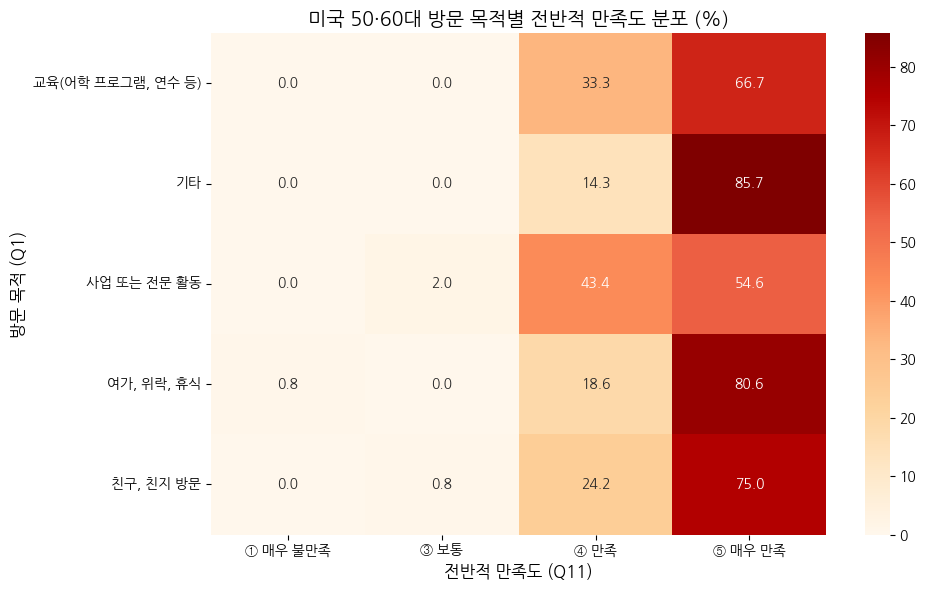

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 미국 50+60대 이상 필터링
df_us_5060 = df[(df['D_NAT'] == '미국') & (df['D_AGE'].isin(['50대', '60대이상']))]

# 1. 교차표 생성 (행=방문 목적, 열=전반적 만족도)
cross_q1_q11_us = pd.crosstab(
    df_us_5060['Q1'],
    df_us_5060['Q11'],
    normalize='index'
) * 100

# 2. 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_q1_q11_us, annot=True, fmt='.1f', cmap='OrRd')

plt.title('미국 50·60대 방문 목적별 전반적 만족도 분포 (%)', fontsize=14)
plt.xlabel('전반적 만족도 (Q11)', fontsize=12)
plt.ylabel('방문 목적 (Q1)', fontsize=12)
plt.tight_layout()
plt.show()


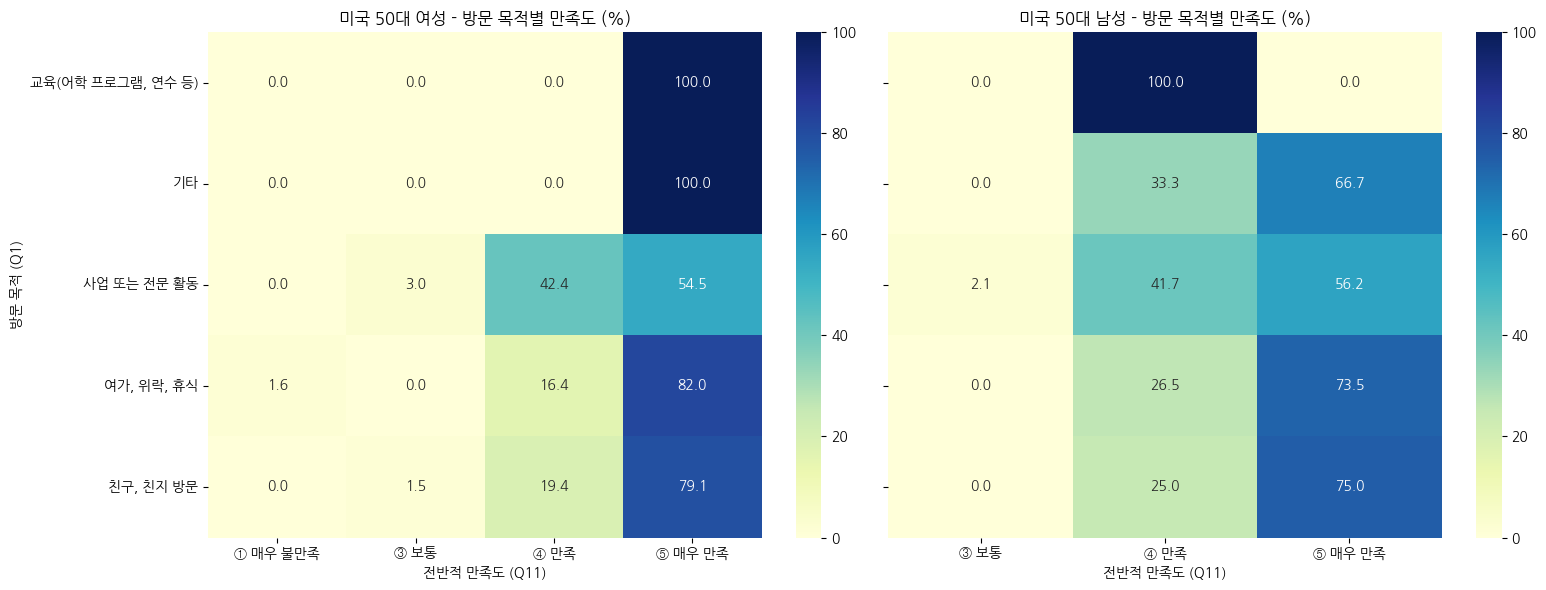

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 미국 50대 여성·남성 각각 필터링
df_us_50f = df[(df['D_NAT'] == '미국') & (df['D_AGE'] == '50대') & (df['D_SEX'] == '여성')]
df_us_50m = df[(df['D_NAT'] == '미국') & (df['D_AGE'] == '50대') & (df['D_SEX'] == '남성')]

# 1. 교차표 생성 (Q1 × Q11)
cross_q1_q11_f = pd.crosstab(df_us_50f['Q1'], df_us_50f['Q11'], normalize='index') * 100
cross_q1_q11_m = pd.crosstab(df_us_50m['Q1'], df_us_50m['Q11'], normalize='index') * 100

# 2. 히트맵 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 여성
sns.heatmap(cross_q1_q11_f, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('미국 50대 여성 - 방문 목적별 만족도 (%)')
axes[0].set_xlabel('전반적 만족도 (Q11)')
axes[0].set_ylabel('방문 목적 (Q1)')

# 남성
sns.heatmap(cross_q1_q11_m, annot=True, fmt='.1f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('미국 50대 남성 - 방문 목적별 만족도 (%)')
axes[1].set_xlabel('전반적 만족도 (Q11)')
axes[1].set_ylabel('')  # 오른쪽 히트맵은 y축 레이블 생략

plt.tight_layout()
plt.show()
